# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     1427.
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           2.25e-45
Time:                        09:55:05   Log-Likelihood:                 13.218
No. Observations:                  50   AIC:                            -18.44
Df Residuals:                      46   BIC:                            -10.79
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0778      0.066     76.924      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.5768896   5.04724123  5.47944116  5.84718473  6.13366048  6.33431224
  6.45758772  6.52355054  6.56058385  6.60072707  6.67441186  6.80546236
  7.00718087  7.28016239  7.61219679  7.98027498  8.35436918  8.70236641
  8.99534459  9.21232431  9.34371574  9.39289417  9.37564547  9.31757254
  9.24988878  9.20428986  9.2077462   9.27807178  9.4209974   9.62922908
  9.88364647 10.15644425 10.41570049 10.63062131 10.77660023 10.83926096
 10.81681937 10.72037661 10.57209526 10.40155803 10.24090745 10.1195649
 10.0593968  10.07112199 10.15255069 10.28894422 10.45543658 10.62111983
 10.75412217 10.82684444]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.80720552 10.6597511  10.40340938 10.08131531  9.75024969  9.4667372
  9.27320722  9.18760563  9.19900104  9.27026116]


## Plot comparison

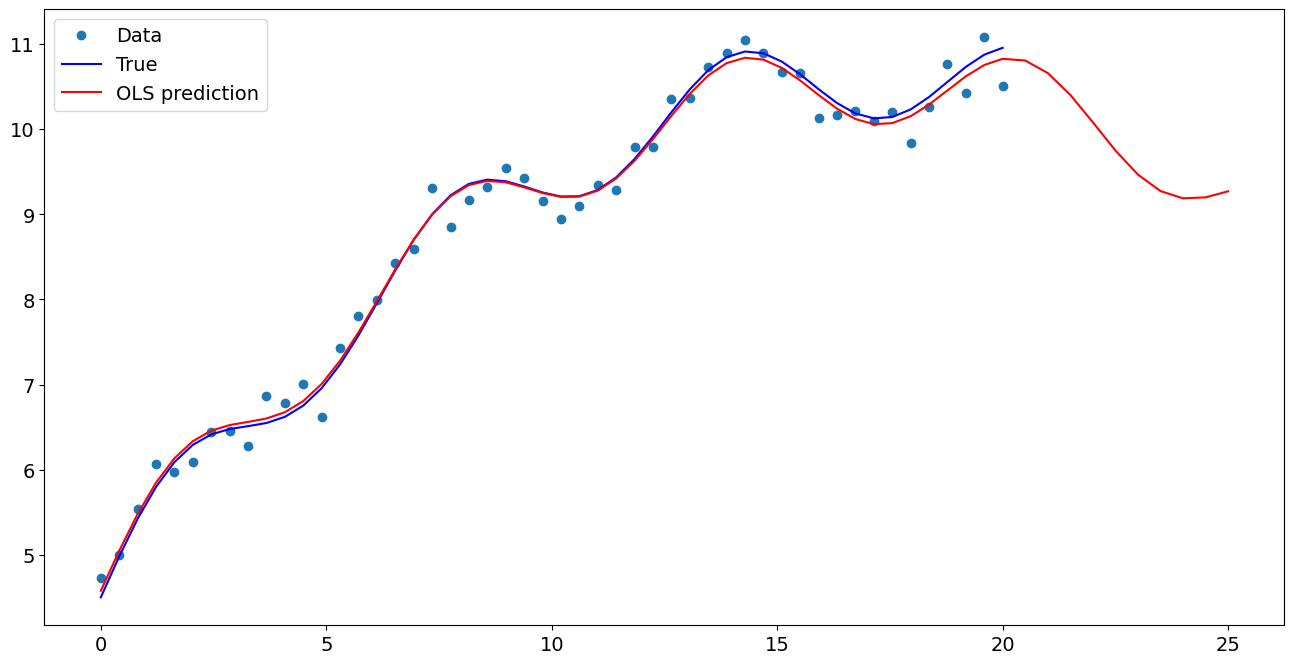

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.077767
x1                  0.490816
np.sin(x1)          0.482662
I((x1 - 5) ** 2)   -0.020035
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.807206
1    10.659751
2    10.403409
3    10.081315
4     9.750250
5     9.466737
6     9.273207
7     9.187606
8     9.199001
9     9.270261
dtype: float64